# Fake news detector

The objective of this work is to use Machine learning to predict if the news is True or Fake.

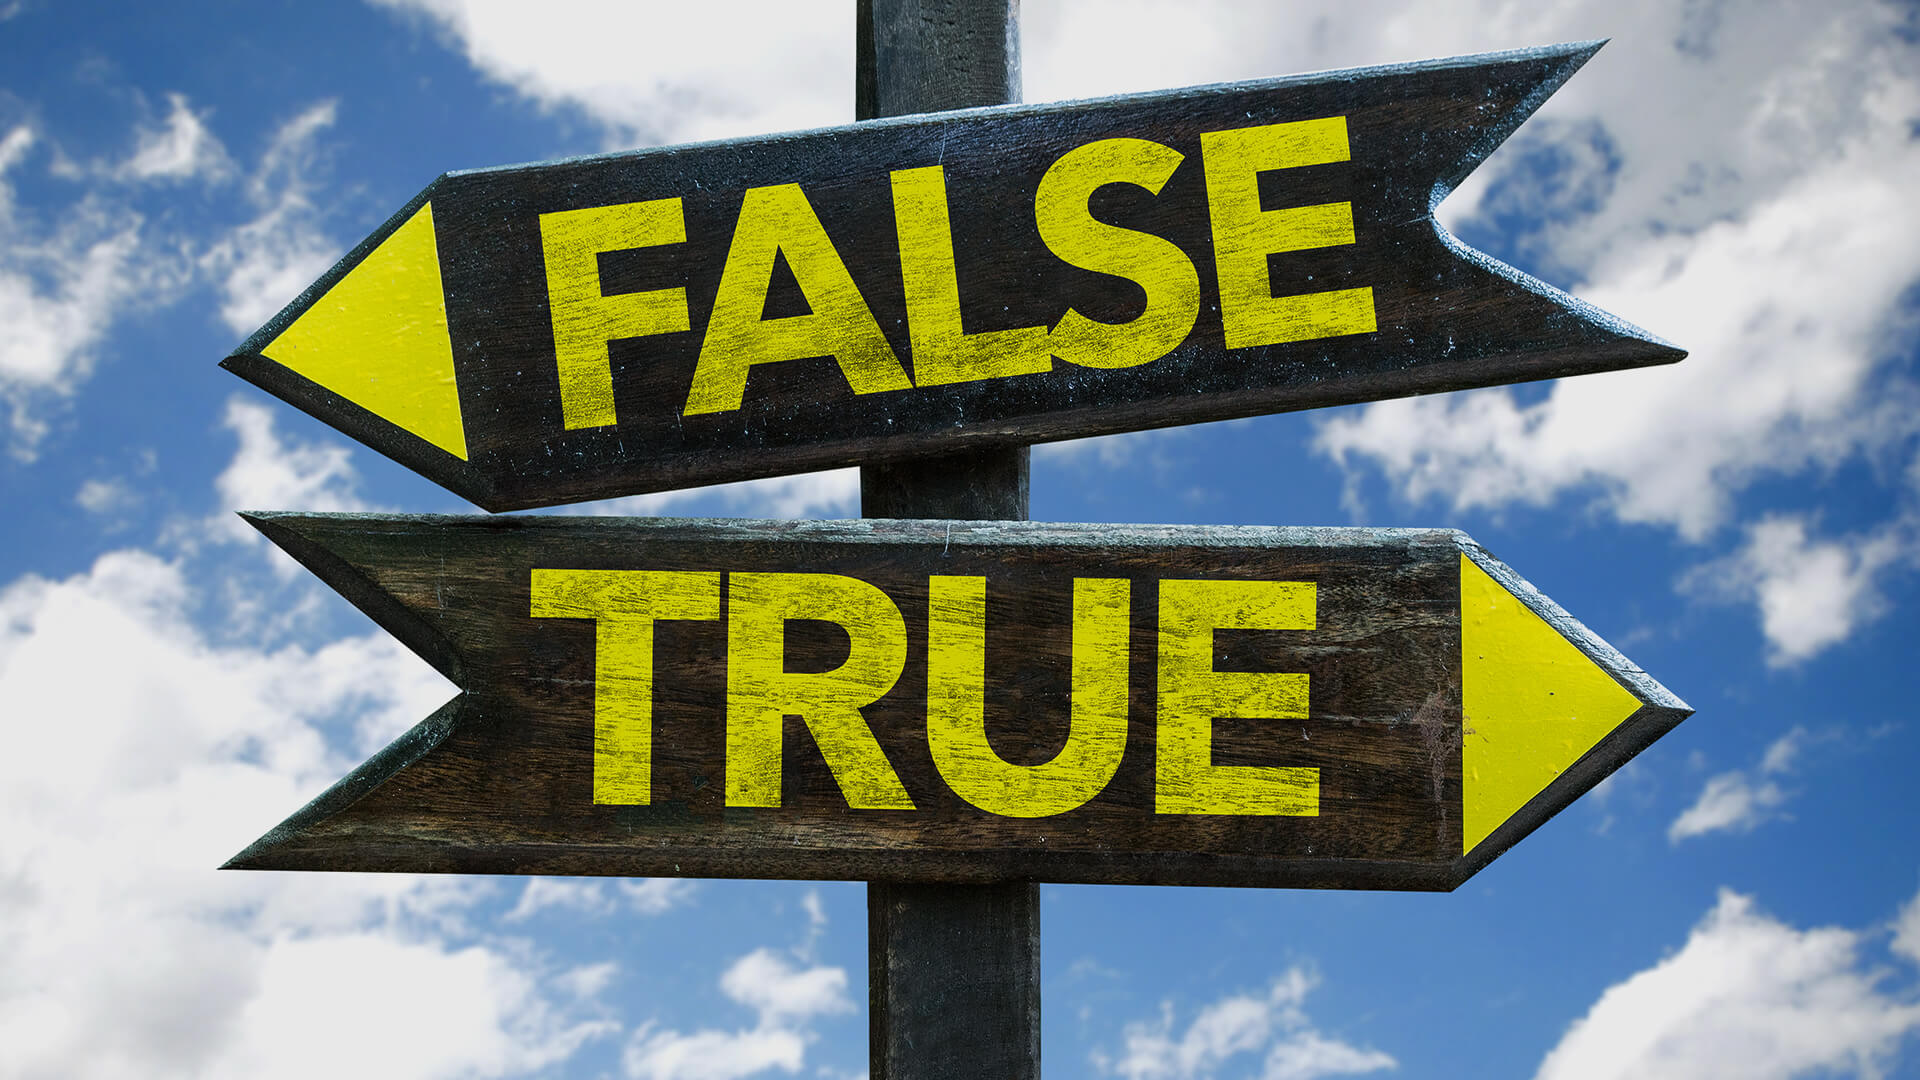

Let's begin importing pandas.

In [1]:
import pandas as pd

In [2]:
#Loading the datasets

true_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [3]:
true_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
#Creating 'check' on both dfs that will be the target feature.

true_df['check'] = 'TRUE'
fake_df['check'] = 'FAKE'

In [6]:
true_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date check  
0  December 31, 2017   TRUE  
1  December 29, 2017   TRUE  
2  December 31, 2017   TRUE  
3  December 30, 2017   TRUE  
4  December 29, 2017   TRUE

In [7]:
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date check  
0  December 31, 2017  FAKE  
1  December 31, 2017  FAKE  
2  December 30, 2017  FAKE  
3  December 29, 2017  FAKE  
4  December 25, 2017  FAKE

In [8]:
true_df.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  check  
count                21417  21417  
unique                 716      1  
top     December 20, 2017    TRUE  
freq                   182  21417

In [9]:
fake_df.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  check  
count          23481  23481  
unique          1681      1  
top     May 10, 2017   FAKE  
freq              46  23481

Now we will combine both dataset and in the next step we will check it shuffled.

In [10]:
#We will combine both dfs.

df_news = pd.concat([true_df, fake_df])

In [11]:
df_news.head(30)

title  \
0   As U.S. budget fight looms, Republicans flip t...   
1   U.S. military to accept transgender recruits o...   
2   Senior U.S. Republican senator: 'Let Mr. Muell...   
3   FBI Russia probe helped by Australian diplomat...   
4   Trump wants Postal Service to charge 'much mor...   
5   White House, Congress prepare for talks on spe...   
6   Trump says Russia probe will be fair, but time...   
7   Factbox: Trump on Twitter (Dec 29) - Approval ...   
8          Trump on Twitter (Dec 28) - Global Warming   
9   Alabama official to certify Senator-elect Jone...   
10  Jones certified U.S. Senate winner despite Moo...   
11  New York governor questions the constitutional...   
12  Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13     Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14  Man says he delivered manure to Mnuchin to pro...   
15  Virginia officials postpone lottery drawing to...   
16  U.S. lawmakers question businessman at 2016 Tr...   
17  Trump on Twitter (Dec 26) - Hillary Clinton, T...   
18  U.S. appeals court rejects challenge to Trump ...   
19  Treasury Secretary Mnuchin was sent gift-wrapp...   
20  Federal judge partially lifts Trump's latest r...   
21  Exclusive: U.S. memo weakens guidelines for pr...   
22  Trump travel ban should not apply to people wi...   
23  Second court rejects Trump bid to stop transge...   
24  Failed vote to oust president shakes up Peru's...   
25  Trump signs tax, government spending bills int...   
26  Companies have up to a year for new U.S. tax b...   
27  Trump on Twitter (Dec 22) - Tax cut, Missile d...   
28  Mexico to review need for tax changes after U....   
29  Senate leader McConnell sees a more collegial ...   

                                                 text       subject  \
0   WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1   WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2   WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3   WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4   SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5   WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6   WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7   The following statements were posted to the ve...  politicsNews   
8   The following statements were posted to the ve...  politicsNews   
9   WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   
10  (Reuters) - Alabama officials on Thursday cert...  politicsNews   
11  NEW YORK/WASHINGTON (Reuters) - The new U.S. t...  politicsNews   
12  The following statements were posted to the ve...  politicsNews   
13  The following statements were posted to the ve...  politicsNews   
14   (In Dec. 25 story, in second paragraph, corre...  politicsNews   
15  (Reuters) - A lottery drawing to settle a tied...  politicsNews   
16  WASHINGTON (Reuters) - A Georgian-American bus...  politicsNews   
17  The following statements were posted to the ve...  politicsNews   
18  (Reuters) - A U.S. appeals court in Washington...  politicsNews   
19  (Reuters) - A gift-wrapped package addressed t...  politicsNews   
20  WASHINGTON (Reuters) - A federal judge in Seat...  politicsNews   
21  NEW YORK (Reuters) - The U.S. Justice Departme...  politicsNews   
22  (Reuters) - A U.S. appeals court on Friday sai...  politicsNews   
23  WASHINGTON (Reuters) - A federal appeals court...  politicsNews   
24  LIMA (Reuters) - Peru’s President Pedro Pablo ...  politicsNews   
25  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
26  WASHINGTON (Reuters) - U.S. financial regulato...  politicsNews   
27  The following statements were posted to the ve...  politicsNews   
28  MEXICO CITY (Reuters) - Mexico’s finance minis...  politicsNews   
29  WASHINGTON (Reuters) - U.S. Senate Majority Le...  politicsNews   

                  date check  
0   December 31, 2017   TRUE  
1   December 29,

In [12]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   check    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [13]:
#Shuffling to see some Fakes

df_news.sample(frac = 1)

title  \
19004  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
12803  Argentina's Fernandez charged with treason, ar...   
4120   Delays dog 'shovel ready' projects in Trump's ...   
10003  Prosecutors say ex-House Speaker Hastert sexua...   
8552    WATCH: This Is What Happens When Media Asks B...   
...                                                  ...   
16404  RADICAL ANTI-GUN MUSLIM State Senator Who Was ...   
16810  Spain hopes Catalans disregard instruction fro...   
22414  Hillary’s Secret Weapon: Evan McMullin is CIA-...   
2808   Trump calls son 'high-quality person,' applaud...   
11725  EU's Tusk says important to end "devastation" ...   

                                                    text          subject  \
19004   Who is silencing political speech, physically...        left-news   
12803  BUENOS AIRES (Reuters) - A federal judge in Ar...        worldnews   
4120   NEW YORK (Reuters) - U.S. President Donald Tru...     politicsNews   
10003  (Reuters) - Former U.S. House Speaker Dennis H...     politicsNews   
8552   During an on interview on This Week, Bernie Sa...             News   
...                                                  ...              ...   
16404  On October 20, 2015, radical Muslim State sena...  Government News   
16810  LONDON (Reuters) - Spanish Foreign Minister Al...        worldnews   
22414  J.R. Smith 21st Century WireMuch has been made...          US_News   
2808   WASHINGTON (Reuters) - President Donald Trump ...     politicsNews   
11725  WARSAW (Reuters) - Poland is currently seen as...        worldnews   

                     date check  
19004        Mar 10, 2017  FAKE  
12803   December 7, 2017   TRUE  
4120      April 23, 2017   TRUE  
10003      April 9, 2016   TRUE  
8552     January 24, 2016  FAKE  
...                   ...   ...  
16404        Sep 16, 2016  FAKE  
16810   October 22, 2017   TRUE  
22414    October 31, 2016  FAKE  
2808       July 11, 2017   TRUE  
11725  December 20, 2017   TRUE  

[44898 rows x 5 columns]

In [14]:
#Searching for null values.

df_news.isna().sum()

title      0
text       0
subject    0
date       0
check      0
dtype: int64

In [15]:
#We will join title, text and subject to create the article feature
df_news['article'] = df_news['title']+""+df_news['text']+""+['subject']

In [16]:
#Creating the final Dataframe with article and check.

df = df_news[['article','check']]

In [17]:
#Converting to lower case

df['article'] = df['article'].apply(lambda x: x.lower())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df['article'].head()

0    as u.s. budget fight looms, republicans flip t...
1    u.s. military to accept transgender recruits o...
2    senior u.s. republican senator: 'let mr. muell...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge 'much mor...
Name: article, dtype: object

In [19]:
#Removing punctuation

import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [20]:
df['article'] = df['article'].apply(punctuation_removal)
df['article'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    as us budget fight looms republicans flip thei...
1    us military to accept transgender recruits on ...
2    senior us republican senator let mr mueller do...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge much more...
Name: article, dtype: object

In [ ]:
#Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['article'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
df['article']

In [ ]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.article])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We will divide the data in to fake and true. 

In [ ]:
#Function to generate wordcloud to True news.

def wordcloud_true(text, column_text):
    true_text = text.query("check == 'TRUE'")
    all_words = ' '.join([text for text in true_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
#Function to generate wordcloud to Fake news.

def wordcloud_fake(text, column_text):
    fake_text = text.query("check == 'FAKE'")
    all_words = ' '.join([text for text in fake_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
#Wordcloud of the true news.

wordcloud_true(df, "article")

In [ ]:
#Wordcloud of the fake news.

wordcloud_fake(df, "article")

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [ ]:
import seaborn as sns
import nltk
    
def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

In [ ]:
#The 20 more frequent words.

pareto(df, "article", 20)

In [ ]:
#Lemmatization

'''from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in df["article"]]

df['article'] = df["article"].apply(lemmatize_text)'''

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df['article'])

article_vect = bow_article.transform(df['article'])

In [ ]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

In [ ]:
#We will use 20% of the data to train the models.

from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['check']



X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2)

In [ ]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

fakenews_detector = MultinomialNB().fit(X_train, Y_train)

In [ ]:
#Model Evaluation
predictions = fakenews_detector.predict(X_test)
print(predictions)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

In [ ]:
from sklearn.linear_model import SGDClassifier

fake_detector_svc = SGDClassifier().fit(X_train, Y_train)

In [ ]:
prediction_svc = fake_detector_svc.predict(X_test)

In [ ]:
print (classification_report(Y_test, prediction_svc))

In [ ]:
from sklearn.linear_model import LogisticRegression

fake_detector_logistic = LogisticRegression().fit(X_train, Y_train)

In [ ]:
predictions_log_reg = fake_detector_logistic.predict(X_test)
print (classification_report(Y_test, predictions_log_reg))